In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#q1
#chargement des donnees
exc = pd.ExcelFile("AGRIBALYSE3.1_partie agriculture_conv_vf.xlsx")
df = pd.read_excel(exc, 'AGB_agri_conv', usecols = [0]+[i for i in range(3,20)])
data = df[2:].values

#q2
#Normalisation des differents criteres:
facteurDeNorm=[7.55e3,5.23e-2,4.22e3,4.09e1,5.95e-4,1.29e-4,1.73e-5,5.56e1,1.56,1.95e1,1.77e2,5.67e4,8.19e5,1.15e4,6.5e4,6.36e-2]
data[:, 2:] = data[:, 2:] / facteurDeNorm

#q3
#Realisation des graphiques pour illustrer les liens entre les criteres 1,14 et 16:
critere1 = data[:, 2] 
critere14 = data[:, 15]
critere16 = data[:, 17] 

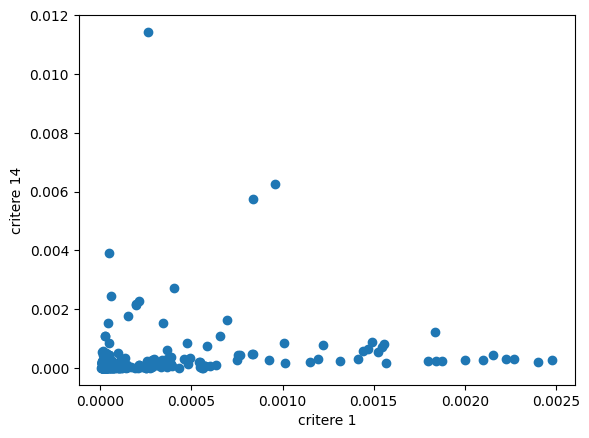

In [38]:
fig, ax = plt.subplots()
ax.scatter(critere1,critere14)
plt.xlabel("critere 1")
plt.ylabel("critere 14")
plt.show()

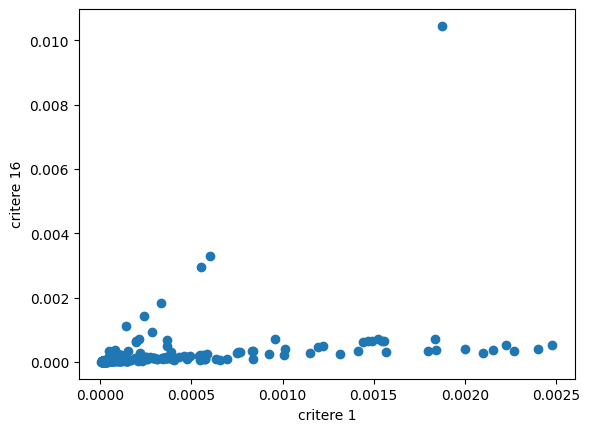

In [4]:
fig2, ax2 = plt.subplots()
ax2.scatter(critere1,critere16)
plt.xlabel("critere 1")
plt.ylabel("critere 16")
plt.show()

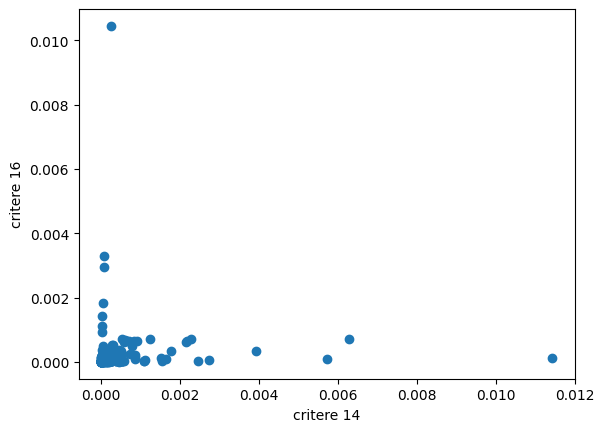

In [32]:
fig3, ax3 = plt.subplots()
ax3.scatter(critere14,critere16)
plt.xlabel("critere 14")
plt.ylabel("critere 16")
plt.show()

In [33]:
#q5 méthode afin de déterminer si une alternative X Pareto-domine une alternative Y
def pareto_domine(X, Y):
    # Verifier si X est "aussi bien" que Y sur tous les criteres
    if all(X[i] <= Y[i] for i in range(len(X))):
        # Verifier si X est strictement meilleure que Y sur au moins un critere
        if any(X[i] < Y[i] for i in range(len(X))):
            return True

    return False


In [34]:
#q6 les méthodes pour vérifier les propriétés identifiées à la question 4 devant être vérifiées par la Pareto dominance
#pour l'irreflexive :  non pareto_domine(X, X) pour tous X
def est_irreflexive(A):
    for X in A:
        # Verifie si X Pareto-domine X
        if pareto_domine(X, X):
            return False
    return True


In [35]:
#pour l'antisymetrie : pareto_domine(X, Y) and pareto_domine(Y, X) ==> X=Y
def est_antisymetrique(A):
    for X in A:
        for Y in A:
            if X != Y:
                # Vérifie si X Pareto-domine Y et Y Pareto-domine X
                if pareto_domine(X, Y) and pareto_domine(Y, X):
                    return False
    return True


In [36]:
#transitivite : pareto_domine(X, Y) and pareto_domine(Y, Z) ===> pareto_domine(X, Z)
def est_transitive(A):
    for X in A:
        for Y in A:
            for Z in A:
                # Vérifie si X Pareto-domine Y et Y Pareto-domine Z
                if pareto_domine(X, Y) and pareto_domine(Y, Z):
                    # Vérifie si X Pareto-domine Z
                    if not pareto_domine(X, Z):
                        return False
    return True


In [37]:
#asymetrie = antisymetrie + irreflexive
def est_asymetrique(A):
    if est_antisymetrique(A) and est_irreflexive(A):
        return True
    return False

In [38]:
def pourcentage_pareto_dominance(A):
    n = len(A)
    count = 0
    for i in range(n):
        for j in range(n):
            if i != j and pareto_domine(A[i], A[j]):# A[i]!=A[j]
                count += 1
    return 2*count / (n * (n-1)) * 100 # n*(n-1)/2 est le nombre total de pair distinct dans l'ensemble A (2 parmis n)


In [43]:
#q7
A=data[:, 2:]

print("le pourcentage d’ensembles {X, Y } de deux alternatives avec X ∈ A != Y ∈ A tels que X Pareto-domine Y :",pourcentage_pareto_dominance(A))

le pourcentage d’ensembles {X, Y } de deux alternatives avec X ∈ A != Y ∈ A tels que X Pareto-domine Y : 29.17003382119661


In [40]:
A_new = data[:, [2,15,17]]#selection des criteres 1,14 et 16
A_new.shape
print("evolution du poucentage d'ensemble avec les criteres 1,14 et 16 :",pourcentage_pareto_dominance(A_new))

evolution du poucentage d'ensemble avec les criteres 1,14 et 16 : 54.30846128520547


In [41]:
#On voit qu'avec les criters 1,14 et 16 le pourcentage augmente fortement donc il y'a plus de frequences pour avoir X ∈ A != Y ∈ A tels que X Pareto-domine Y


In [42]:
#q8 pensez vous que les substitutions enres les criteres 1,14 et 16 sont a calculer sur une alternative choisis ou sur l'ensemble ?
#est-ce qu'il un sens sur la contrainte suivante a la question 9 : SPŵ (X) ≥ SPŵ (Y ) pour le programme lineaire ?

In [44]:
#jeu de poids
w_hat = [21.06e-2,6.31e-2,5.01e-2,4.78e-2,8.96e-2,1.84e-2,2.13e-2,6.2e-2,2.8e-2,2.96e-2,3.71e-2,1.92e-2,7.94e-2,8.51e-2,8.32e-2,7.55e-2]